### Importing all the basic required libraires

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Importing datasets

In [2]:
data= pd.read_csv('Dataset/train.csv')
target= pd.read_csv('Dataset/train_label.csv',header=None)
print(data.shape,target.shape)

(8708, 9) (8708, 1)


## creating a copy of train dataset and add adding train traget to perform EDA on data3

In [3]:
df=data.copy()

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [5]:
df['target']=target

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   object 
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 612.4+ KB


In [8]:
df.datetime= pd.to_datetime(df.datetime) #coverting datatype to date time

### extracting data from datetime

In [9]:
df['hour'] = df.datetime.dt.hour
df['day'] = df.datetime.dt.weekday
df['month']=df.datetime.dt.month

In [10]:
continues_cols=[ 'temp','atemp', 'humidity', 'windspeed']
categorical_cols=['season', 'holiday', 'workingday', 'weather','hour','day']

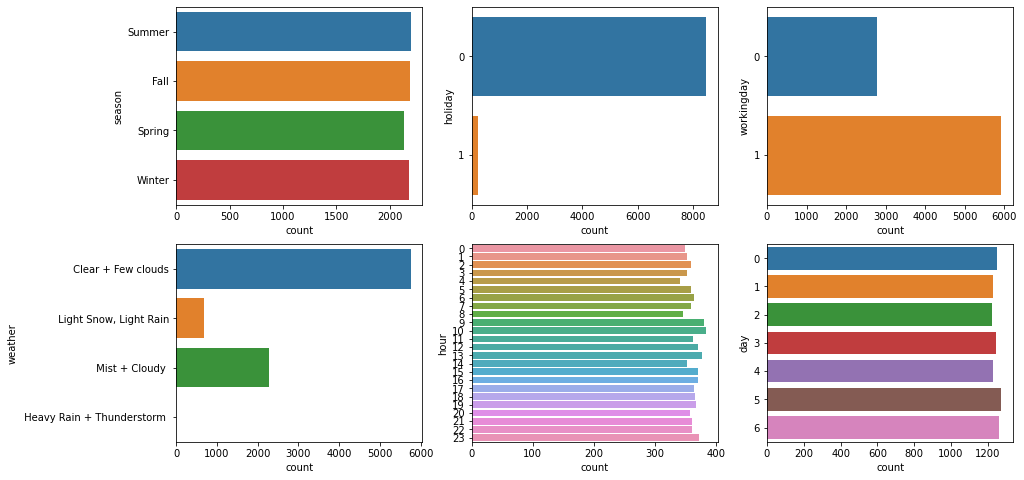

In [11]:
plt.figure(figsize=(15,8))
for index,col in enumerate(categorical_cols):               #using count plot to see different categories
    plt.subplot(2,3,index+1)
    sns.countplot(y=df[col])
plt.show()

##### as we can se that hoiday feature is totaly imbalnce and so we can drop it because working day and holiday
##### both can porovide same inforamtion if there is no anamaly in data

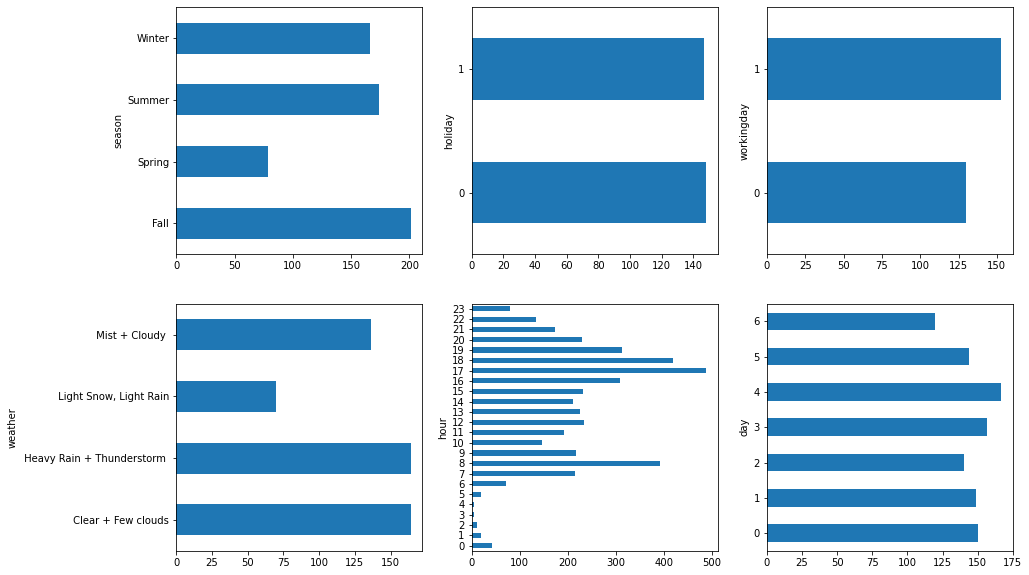

In [12]:
# checking relation with target
plt.figure(figsize=(15,10))
for index,col in enumerate(categorical_cols):
    plt.subplot(2,3,index+1)
    df.groupby(col)['target'].median().plot.barh()
plt.show()

##### can see that hours,season,weather and working day are making impact on target
there are more booking in morning that is office time and in the evening
and in spring there is less number of bookings

### checking correlation between the features

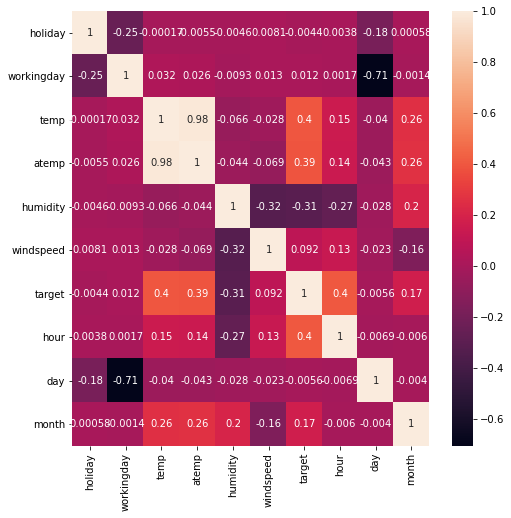

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### checking contineous data and its relation with target

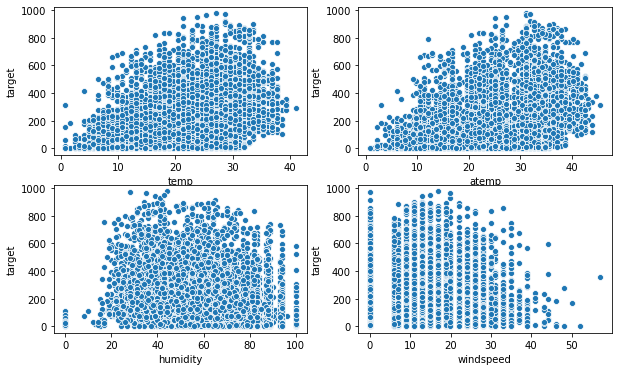

In [14]:
plt.figure(figsize=(10,6))
for index,col in enumerate(continues_cols):
    plt.subplot(2,2,index+1)
    sns.scatterplot(x=col,y='target',data=df)
plt.show()

##### as we can obseve no coleraltion between target and pridicoters linear model will not work efficiently
so we will try other non liner models for priditions

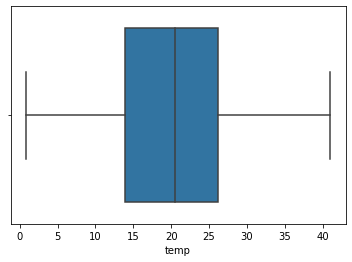

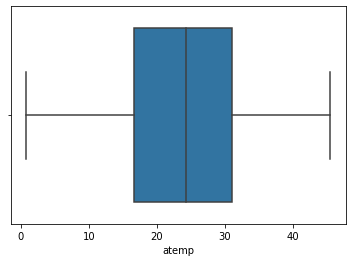

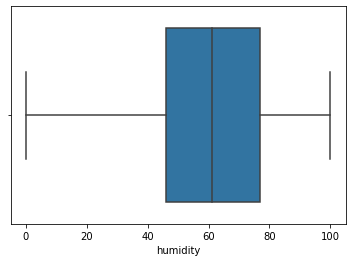

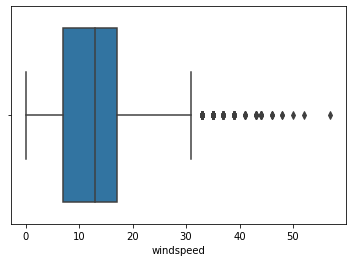

In [15]:
for col in continues_cols:
    sns.boxplot(col,data=df)
    plt.show()

#### target and windspeed have values looking like outliers but sumtimes its possible to have that much bookings and windspeed
so using models which are robust to outliers can be handy here

# Feature Engineering

In [5]:
# importting all datasets
X_train= pd.read_csv('Dataset/train.csv')
y_train= pd.read_csv('Dataset/train_label.csv',header=None)
X_test=pd.read_csv('Dataset/test.csv')
y_test = pd.read_csv('Dataset/test_label.csv',header=None)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8708, 9) (8708, 1) (2178, 9) (2178, 1)


In [6]:
# converting datetime datatype
def to_datetime(data,col):
    df = data.copy()
    df[col]=pd.to_datetime(df[col])
    return df

In [7]:
X_train=to_datetime(X_train,'datetime')
X_test=to_datetime(X_test,'datetime')

In [8]:
# extracting features from datetime column
def extract_from_date(data):
    df = data.copy()
    df['day'] = df.datetime.dt.weekday
    df['hour'] = df.datetime.dt.hour
    df['month'] = df.datetime.dt.month
    df.drop('datetime',axis=1,inplace=True)
    return df

In [9]:
X_train = extract_from_date(X_train)
X_test = extract_from_date(X_test)

In [10]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2,19,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2,4,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,3,9,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,4,16,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,1,13,9
...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,0,6,1
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,3,1,11
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,3,4
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,2,1,11


In [11]:
# hendling categorical data with dummy variables and droing 1st to avoid dummy variables trap
X_train = pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)


In [12]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,22.14,25.760,77,16.9979,2,19,5,0,1,0,0,0,0
1,0,1,28.70,33.335,79,19.0012,2,4,9,0,0,0,0,0,0
2,0,1,5.74,6.060,50,22.0028,3,9,1,1,0,0,0,0,0
3,0,1,13.94,16.665,29,8.9981,4,16,11,0,0,1,0,0,0
4,0,1,30.34,33.335,51,19.0012,1,13,9,0,0,0,0,0,0


In [13]:
X_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,21.32,25.000,48,35.0008,3,11,5,0,1,0,0,0
1,0,0,23.78,27.275,64,7.0015,5,7,6,0,1,0,0,0
2,0,0,11.48,12.120,100,27.9993,6,20,3,1,0,0,1,0
3,0,1,25.42,28.790,83,0.0000,3,11,10,0,0,1,0,1
4,0,0,25.42,31.060,43,23.9994,5,12,6,0,1,0,0,0


### 'weather_ Heavy Rain + Thunderstorm ' feature is not present in test data so i will create this feature in test data with zero values for making prediction

In [14]:
X_test['weather_ Heavy Rain + Thunderstorm ']=np.zeros(len(X_test))

In [15]:
X_test.head(1)

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weather_ Heavy Rain + Thunderstorm
0,0,1,21.32,25.0,48,35.0008,3,11,5,0,1,0,0,0,0.0


In [16]:
X_train.head(1)

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,22.14,25.76,77,16.9979,2,19,5,0,1,0,0,0,0


### re-arranging columns of test to match with train

In [17]:
X_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'day', 'hour', 'month', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ', 'weather_ Heavy Rain + Thunderstorm '],
      dtype='object')

In [18]:
X_test=X_test[['holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed','day', 'hour','month', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Heavy Rain + Thunderstorm ', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ']]

In [19]:
X_train.head(1)

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,22.14,25.76,77,16.9979,2,19,5,0,1,0,0,0,0


In [20]:
X_test.head(1)

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,21.32,25.0,48,35.0008,3,11,5,0,1,0,0.0,0,0


In [21]:
X_test['weather_ Heavy Rain + Thunderstorm '] =X_test['weather_ Heavy Rain + Thunderstorm '].astype(int)

In [22]:
X_test.head(1)

,holiday,workingday,temp,atemp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,21.32,25.0,48,35.0008,3,11,5,0,1,0,0,0,0


In [23]:
# i will drop holiday and atemp columns because they are highely corelated with working day and temp respectively
X_train.drop(['holiday','atemp'],axis=1,inplace=True)
X_test.drop(['holiday','atemp'],axis=1,inplace=True)

In [24]:
print(X_test.columns)

Index(['workingday', 'temp', 'humidity', 'windspeed', 'day', 'hour', 'month',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')


# Model Building

#### From eda i observed that its batter to use models which are robust to outliers and non linears
let us see by trying

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [36]:
lr = LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svm=SVR()

models = {'lr':lr,
         'dt':dt,
         'rf':rf,
         'xgb':xgb,
         'knn':knn,
         'svm':svm}

In [37]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name,':',np.round(model.score(X_train,y_train),2),np.round(model.score(X_test,y_test),2))

lr : 0.35 0.35
dt : 1.0 0.76
rf : 0.98 0.87
xgb : 0.95 0.89
knn : 0.73 0.6
svm : 0.24 0.26


#### xgboost and randomforest is giving higher accuracy than other models so i will do hyperparameter tuning on both the models

In [38]:
param = {'n_estimators':[20,40,60,100],
         'max_depth':[5,8,12,14,16],
        'max_features':['auto','sqrt'],
        'min_samples_leaf':[1, 2],
        'min_samples_split':[2, 5,]}

In [39]:
rf=RandomForestRegressor()
cv=GridSearchCV(rf,param_grid=param,cv=2,n_jobs=-1,verbose=2)
cv.fit(X_train,y_train)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   33.2s finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 12, 14, 16],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 40, 60, 100]},
             verbose=2)

In [40]:
cv.best_params_

{'max_depth': 16,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
print(np.round(cv.score(X_test,y_test),2))

0.87


#### random forest doesnot making any differnce in accuracy after tuning lets try tuning for xgb

In [42]:
xgb_param = {"n_estimators":[20,40,60,90,100],
             "learning_rate": [0.05, 0.10, 0.20,0.30 ],
             "max_depth": [5, 6, 8,12, 15],
             "min_child_weight": [ 1, 3, 5 ],
             "gamma": [ 0.0, 0.1, 0.2 ],}

In [43]:
xgb=XGBRegressor()
cv_xgb=GridSearchCV(xgb,param_grid=xgb_param,cv=2,n_jobs=-1,verbose=2)
cv_xgb.fit(X_train,y_train)

Fitting 2 folds for each of 900 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.3min finished


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [44]:
cv_xgb.best_params_

{'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100}

In [45]:
cv_xgb.score(X_test,y_test)

0.8835849810140254

#### Because there is no difference between the accuracy before and after the gridsearch it means base parameters were best so now i will use xgb as my model......

In [46]:
xgbb=XGBRegressor()
xgb.fit(X_train,y_train)
r2_score=np.round(xgb.score(X_test,y_test),2) #using upper base model not using grid model.....

## model evaluation

In [47]:
print(r2_score)

0.89


In [40]:
X_test.head(1)

,workingday,temp,humidity,windspeed,day,hour,month,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,1,21.32,48,35.0008,3,11,5,0,1,0,0,0,0


In [48]:
y_pred=xgb.predict(X_test)

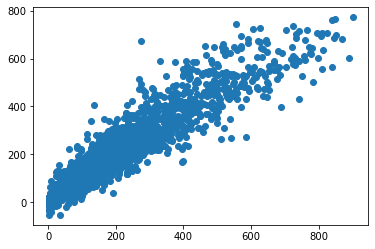

In [49]:
plt.scatter(y_test,y_pred)

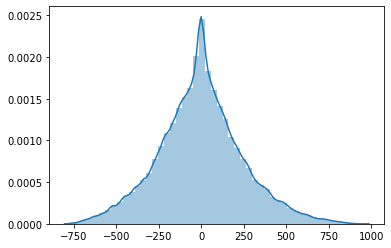

In [50]:
sns.distplot(y_test.values-y_pred)

### save pickle file

In [26]:
import pickle
with open('xgboost.pickle','wb') as f:
    pickle.dump(xgb,f)

In [29]:
# load model for checking
with open('xgboost.pickle','rb') as f:
    model=pickle.load(f)

In [53]:
np.round(model.score(X_test,y_test),2)

0.89

In [54]:
# saving features
predictors=pd.DataFrame(X_train.columns)

In [78]:
Predictors.to_csv('pred.csv',index=False)

# By adding year feature i can increase accuracy upto 93% but according to me taking past years as featurs is not a right approach